In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

In [2]:
df = pd.read_csv('./data/winequality-red.csv', sep=';', header=0)
data = df.iloc[:, :-1]
data = data.sample(frac=.5)
std = StandardScaler().fit_transform(data)
kmeanModel1 = KMeans(n_clusters=3)
kmeanModel1.fit(std)
clusterID = kmeanModel1.predict(std)

embeddings = MDS(n_components=2, random_state=0)
data_transform = embeddings.fit_transform(std)


c:\Users\zhouc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zhouc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [7]:
pd.DataFrame(clusterID,columns=["ID"])

,ID
0,2
1,1
2,1
3,2
4,2
...,...
795,0
796,0
797,2
798,2


In [8]:
data.reset_index(drop=True, inplace=True)

In [9]:
 pd.concat([data, pd.DataFrame(clusterID,columns=["ID"])], axis=1) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,ID
0,8.0,0.500,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7,2
1,7.2,0.380,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5,1
2,11.6,0.420,0.53,3.3,0.105,33.0,98.0,1.00100,3.20,0.95,9.2,1
3,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,2
4,7.1,0.660,0.00,3.9,0.086,17.0,45.0,0.99760,3.46,0.54,9.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
795,9.4,0.340,0.37,2.2,0.075,5.0,13.0,0.99800,3.22,0.62,9.2,0
796,13.3,0.290,0.75,2.8,0.084,23.0,43.0,0.99860,3.04,0.68,11.4,0
797,5.8,1.010,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,2
798,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,2


In [48]:
data.columns.values.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [30]:
print(data_transform)

[[ 1.96629944 -1.02602142]
 [-0.86331054 -1.61949433]
 [ 0.75735649  3.89621112]
 ...
 [-0.57267712 -2.6427644 ]
 [-2.7005776  -0.40685271]
 [ 2.03431676 -0.14620808]]


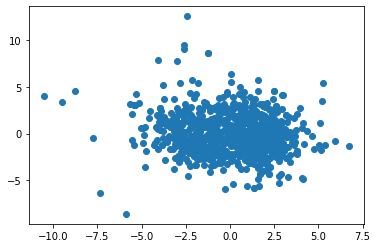

In [41]:
plt.scatter(data_transform[:,0], data_transform[:,1])

In [31]:
print(len(data))

800


In [32]:
print(len(df))

1599


In [44]:
corre_matrix = 1-data.corr().abs()

In [45]:
MDS_corr = MDS(n_components=2, dissimilarity='precomputed',random_state=0)
corr_transform = MDS_corr.fit_transform(corre_matrix)


c:\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


In [42]:
corr_transform

array([[ 0.24678465,  0.35307711],
       [ 0.61916862, -0.08910137],
       [ 0.41155062,  0.15282343],
       [-0.32557341,  0.56723732],
       [ 0.05891426, -0.6003869 ],
       [-0.65134121,  0.06227996],
       [-0.63294042, -0.11543874],
       [-0.00556618,  0.3780858 ],
       [ 0.17388498,  0.12460749],
       [ 0.38660755, -0.42638722],
       [-0.28148945, -0.40679689]])

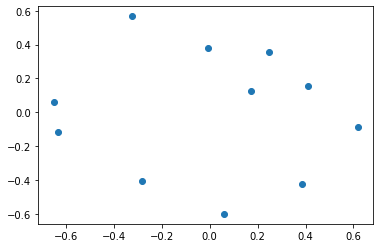

In [43]:
plt.scatter(corr_transform[:,0], corr_transform[:,1])

In [40]:
data.to_json(orient='records')

'[{"fixed acidity":6.4,"volatile acidity":0.64,"citric acid":0.21,"residual sugar":1.8,"chlorides":0.081,"free sulfur dioxide":14.0,"total sulfur dioxide":31.0,"density":0.99689,"pH":3.59,"sulphates":0.66,"alcohol":9.8},{"fixed acidity":7.9,"volatile acidity":0.34,"citric acid":0.42,"residual sugar":2.0,"chlorides":0.086,"free sulfur dioxide":8.0,"total sulfur dioxide":19.0,"density":0.99546,"pH":3.35,"sulphates":0.6,"alcohol":11.4},{"fixed acidity":10.6,"volatile acidity":1.02,"citric acid":0.43,"residual sugar":2.9,"chlorides":0.076,"free sulfur dioxide":26.0,"total sulfur dioxide":88.0,"density":0.9984,"pH":3.08,"sulphates":0.57,"alcohol":10.1},{"fixed acidity":6.8,"volatile acidity":0.61,"citric acid":0.04,"residual sugar":1.5,"chlorides":0.057,"free sulfur dioxide":5.0,"total sulfur dioxide":10.0,"density":0.99525,"pH":3.42,"sulphates":0.6,"alcohol":9.5},{"fixed acidity":9.0,"volatile acidity":0.69,"citric acid":0.0,"residual sugar":2.4,"chlorides":0.088,"free sulfur dioxide":19.0